In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive', True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

pd.set_option('display.max_columns', None)
dir_path = '/content/drive/MyDrive/Lab 6 - Final Test/'

# Puzzle


In [ ]:
import os

import pandas as pd

# Read the CSV files
data_frames = []
for i in range(1, 101):
    path = dir_path + f'puzzle/pieces_of_letter/piece_{i}.csv'
    if os.path.isfile(path):
        df = pd.read_csv(path, header=None)
        data_frames.append(df)

# Concatenate the data frames
df = pd.concat(data_frames, ignore_index=True)

# Extract the first two columns as coordinates
x = df.iloc[:, 0]
y = df.iloc[:, 1]

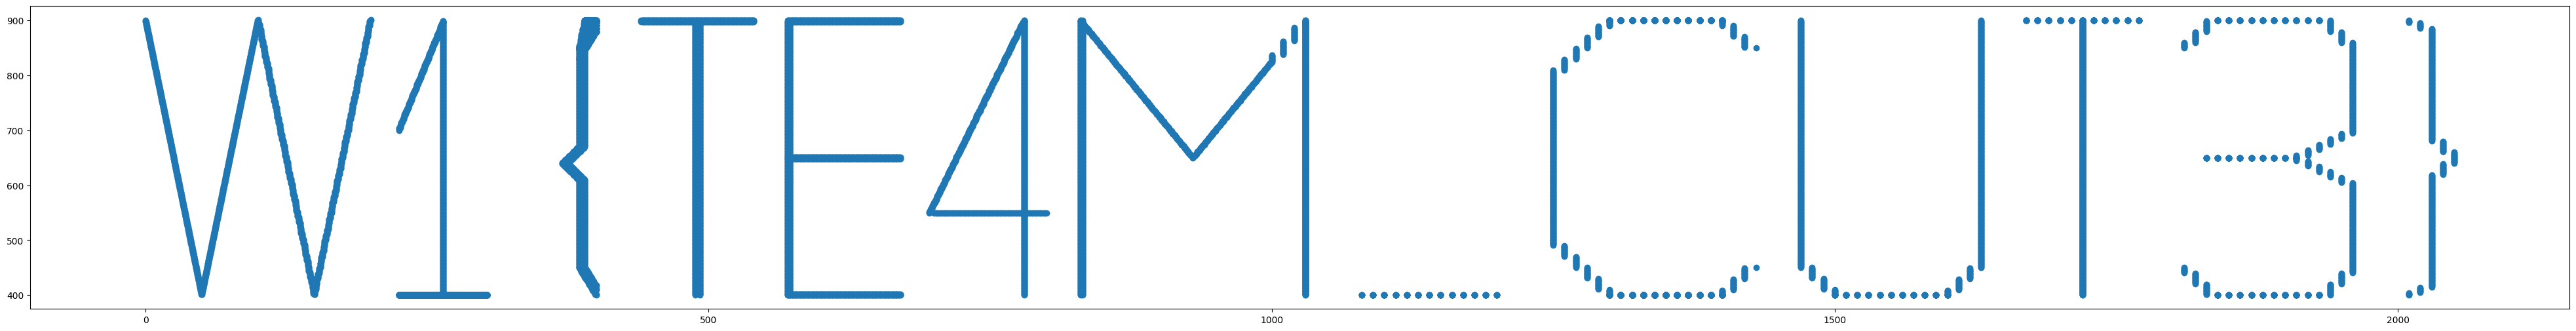

In [ ]:
# Plot the coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 6))
plt.scatter(x, y)

# Thiết lập định dạng cho trục y
# Hiển thị biểu đồ
plt.show()

FLAG 1

**W1{TE4M_CUT3}**

# Teach me

Trong notebook này nhóm bọn em sử dụng một số model để học và phân loại, bao gồm có các model phổ biến và cho kết quả khá cao trong nhiều trường hợp như XGBoost và RandomForest, cũng như một số loại model deeplearning như CNN.

Ban đầu bọn em định tập trung vào tối ưu model deeplearning nhưng kết quả của dạng model này không được tốt, vì vậy bọn em chỉ tập trung tối ưu 2 model còn lại...

Phương pháp bọn em sử dụng là GridSearch trên từng parameter của model để tìm ra tham số tối ưu, mặc dù kết quả đã cải thiện nhưng không nhiều, không thể đạt được đến mức có thể đọc toàn bộ text trôi chảy.

Model cho ra kết quả tốt nhất sau khi thực hiện Grid Search là XGBoost với Cross-Validation Score là 0.9997442062177407, trong khi đổi với RandomForest là 0.9992645945592898

Chi tiết code và kết quả nằm ở phía bên dưới.

In [ ]:
# @title Load data

X = pd.read_csv(dir_path + 'Teach me/X.csv', header=None)
Y = pd.read_csv(dir_path + 'Teach me/Y.csv', header=None)
key = pd.read_csv(dir_path + 'Teach me/key.csv', header=None)
print(X.shape)
print(Y.shape)
print(key.shape)

(250202, 115)
(250202, 1)
(23040, 115)


In [ ]:
# @title model XGBoost
from xgboost.sklearn import XGBClassifier
m = XGBClassifier().fit(X, Y)

In [ ]:
y_pred = m.predict(key)

In [ ]:
# @title decode function
def decode(y_pred):
    # Chuyển đổi mảng numpy thành chuỗi các bit
    bit_string = ''.join(y_pred.astype(str))

    # Tách chuỗi bit thành các nhóm 8 bit (1 byte)
    byte_chunks = [bit_string[i:i+8] for i in range(0, len(bit_string), 8)]

    # Chuyển đổi mỗi nhóm 8 bit thành một ký tự ASCII
    decoded_string = ''.join([chr(int(byte, 2)) for byte in byte_chunks if len(byte) == 8])

    return decoded_string

In [ ]:
print(decode(y_pred))

                                           @    a      &`    pd                                 `    â   .P!    c@    a   @i @,h   )d      8     p`    @ !T@   " e`  ``    `  @F @ Hb   "tlb1 Of H@   P	Ma   -@  Gm H   DE!l    n@(@ #tb gE BHAB   `BPPH@%$  X QJ    Sie iû ñuicë|y cauext P -n a plot,in6olV   @Ak!ga
              c`                  ·e,`Ôeîg( and eíbarks(on a[q$`    ämscoveò wèat#is¡"seql".

Thå l/ven's fizst ðzén|i~opsïld ou`$ãì he da} it wc{(reìeaseu a|d sAle2 reached a millioh within a monp@[ T The English-language edition i` !, three volul s, with the first two v"lumes translated by Jay Rubin and the third by  Hilip Gabriel, w!s releaseD Aj North Amurica and the United Kingdom of October 25, 2011.[3][4][56] An excerpt from the nov h appeared in The September 5, 2011 issue of ThE New Yorker magazine as "Town o& Cats".[7] The first cap4er of 1Q84 had ah3f "De. read as !n exce2pt in the Seleãted Shorts s%ries at Sx-pjoy 

In [ ]:
# @title optimize the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [150],
    'max_depth': [5],
    'learning_rate': [0.2],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit the grid search to the data
grid_search.fit(X, Y)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

print(decode(grid_search.best_estimator_.predict(key)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Best Cross-Validation Score:  0.9997442062177407
                                        P    a      &` "  pd                              `    â  .P   c@   a   @$i @,` ` )d    "  8    p`   L @ !T@   " e`  ``       @  Hb   "vlb1 Of È@  P	Ma, h ­@  Wm!H   DE!l   n@(A #tb gE BHAB @ dB PPH`'$  X QJ          @ èy caugxt p -n a plot,in6olV   Aakaga
             cp$`        hdhaÀ   ·e,`Ôeîg( and eíbarks(on a$[/q$dey(to ämscoveò wèat#is¡"seql".

Thå l/ven's fizst pzinti~opsïld ou`$ãì he da} it wc{(reìeaseu and sAle2 reached a millioh within a monp@[ T The English-language edition i`  , three volul s, with the first two v"Lumes translated by Jay Rubin and the third by ilip Gabriel, w!s releaseD aj North Amurica and the United Kingdom of Octob

In [ ]:
# @title model RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X, Y)
print(decode(rf.predict(key)))

<ipython-input-10-e94c0c98c665>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier().fit(X, Y)


              @0   @    @              P              "       @  H  @  !         	  @   	b "   è   ,     @      À                !         @@@ a`      P $D  "  P `   $ B H A btD"0 HH     P L 8       H   Dg`   @     " b! D Bh@ $@  B Rri`@ n Th% qn ld. She is qu)ckly caueht up (n a plot involvHf Qa# d!e a religious lt, and her childhoïd lve, Tengo( and embarks on a$Y,".ey to discher what"is "real".

The l/vel's fizst printing sold ou` `   E day it was reìeasee ald sle2 reached a milliol within a monpB  Q @ E Englésh-languqge edition`mb  , tjree volul s,(with the firsà 47o v&dumes translated by Jay Rubin and the third by  ilip Gabriel, was re aseD a" @	rth America and the United Kingdom of October 25, 2011.[3][4][56] An excerpt from the nov@h appeared in the Septem`%r 5, 2011 issue of Th Lew Yorker magazine as "Town o& Cats".[7] The f`rst chapter of 1Q84 had ah3f "een read as !n ehce2pt in the Selected Shorts s%ries at Symphony 

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=4)

# Fit the grid search to the data
grid_search.fit(X, Y)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

print(decode(grid_search.best_estimator_.predict(key)))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time= 2.3min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.999 total time= 2.3min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score:  0.9992645945592898
             @                        P              "      I @  H              	  @    	 "                @      @                !          @@@ `      P $  "     `   $ B H A b`"0 HH@    P  0       H   Dg`   @    2 r! d ch@ d@  brRi`  n Th$ qn  . She is qu)ckly caueht qP (n a plot involvHb Qa#!@!e a religious lt, and her childhoïd lve, Tengo( and embarks(on a$Y, ,ey to discheò wèat"is "reql".

rth America and the United Kingdom of October 25, 2011.[3][4][46] An excerpt from the nov@h appeared in the Septem`%r 5, 2011 issue of Th Dew Yorker magazine as "Town o& Cats".[7] The f`rst chapter of 1Q84 had ah3f "eEn read as !n ehcerpt in the Selected Shorts s%ries at Symphony S @ae if New York. 

Whi,e uell received in Japan, 1Q84 was met with mixed R`vidw3 f

In [ ]:
# @title model CNN
import tensorflow as tf

# Tạo mô hình deep learning
model = tf.keras.Sequential(
    [
        tf.keras.layers.Reshape((115, 1), input_shape=(115,)),
        # Convolutional layers
        tf.keras.layers.Conv1D(32, 11, activation='relu'),
        tf.keras.layers.AveragePooling1D(2,2),
        tf.keras.layers.Conv1D(64, 11, activation='relu'),
        tf.keras.layers.AveragePooling1D(2,2),
        tf.keras.layers.Conv1D(128, 11, activation='relu'),
        tf.keras.layers.AveragePooling1D(2,2),

        # Flatten the output and feed into a Dense layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.15),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Xem thông tin của mô hình
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 115, 1)            0         
                                                                 
 conv1d_13 (Conv1D)          (None, 105, 32)           384       
                                                                 
 average_pooling1d_6 (Avera  (None, 52, 32)            0         
 gePooling1D)                                                    
                                                                 
 conv1d_14 (Conv1D)          (None, 42, 64)            22592     
                                                                 
 average_pooling1d_7 (Avera  (None, 21, 64)            0         
 gePooling1D)                                                    
                                                                 
 conv1d_15 (Conv1D)          (None, 11, 128)          

In [ ]:
Y.value_counts()

1    141175
0    109027
Name: count, dtype: int64

In [ ]:
# Huấn luyện mô hình
model.fit(x=X, y=Y, batch_size=512, epochs=10, shuffle=True)

Epoch 1/10
489/489 [==============================] - 4s 8ms/step - loss: 220494544.0000 - acc: 0.5642 - precision_2: 0.5643 - recall_2: 0.9996
Epoch 2/10
489/489 [==============================] - 7s 13ms/step - loss: 12674476032.0000 - acc: 0.5644 - precision_2: 0.5644 - recall_2: 0.9996
Epoch 3/10
489/489 [==============================] - 4s 9ms/step - loss: 1112896512.0000 - acc: 0.5642 - precision_2: 0.5642 - recall_2: 1.0000
Epoch 4/10
489/489 [==============================] - 4s 8ms/step - loss: 3156527616.0000 - acc: 0.5642 - precision_2: 0.5642 - recall_2: 0.9999
Epoch 5/10
489/489 [==============================] - 5s 10ms/step - loss: 753291072.0000 - acc: 0.5642 - precision_2: 0.5642 - recall_2: 0.9999
Epoch 6/10
489/489 [==============================] - 4s 8ms/step - loss: 632752832.0000 - acc: 0.5642 - precision_2: 0.5642 - recall_2: 1.0000
Epoch 7/10
489/489 [==============================] - 4s 8ms/step - loss: 41781532.0000 - acc: 0.5642 - precision_2: 0.5642 - reca

In [ ]:
# Tính toán kết quả
preds = model.predict(key)

720/720 [==============================] - 1s 2ms/step


In [ ]:
y_pred = (preds > 0.50).astype(int).reshape(-1)

In [ ]:
print(decode(y_pred))

ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ

FLAG 2

**G1{hey_you_are_unteachable}**